Fold 1 - Mean Squared Error: 0.0
Fold 2 - Mean Squared Error: 0.0
Fold 3 - Mean Squared Error: 0.0
Fold 4 - Mean Squared Error: 0.0
Fold 5 - Mean Squared Error: 0.0

Average Mean Squared Error across 5 folds: 0.0

Model Coefficients: [-2.e+04 -2.e+00  1.e+04  5.e+04]
Model Intercept: 1000000.0000000123

Predicted price for the new car: ₹1040000.0


C:\Users\prath\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


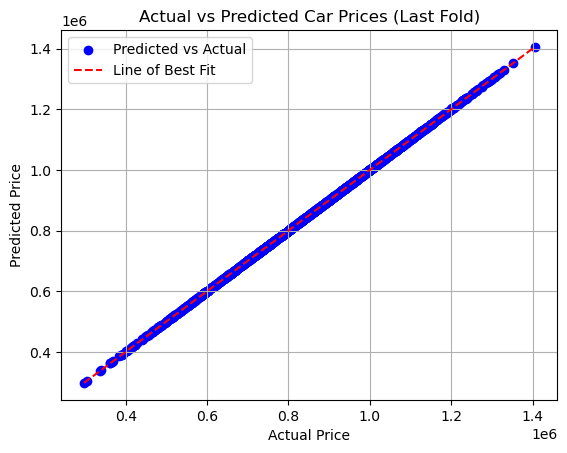

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv("pricepredictioncar.csv")

# Preprocessing: Feature Engineering
df["car_age"] = 2025 - df["year"]  # Add car age feature

# Define input features and target
X = df[["car_age", "distance", "mileage", "engine_size"]]
y = df["price"]

# Initialize the model
model = LinearRegression()

# Define K-Fold Cross Validator (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store performance metrics
mse_scores = []
fold = 1

# Perform K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate MSE for this fold
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    print(f"Fold {fold} - Mean Squared Error: {round(mse, 2)}")
    fold += 1

# Average MSE across all folds
avg_mse = np.mean(mse_scores)
print(f"\nAverage Mean Squared Error across {kf.get_n_splits()} folds: {round(avg_mse, 2)}")

# Coefficients and intercept (from last trained fold)
print(f"\nModel Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

# Predicting price for a new car
new_car = np.array([[5, 30000, 12, 1.6]])  # Example input
predicted_price = model.predict(new_car)
print(f"\nPredicted price for the new car: ₹{round(predicted_price[0], 2)}")

# Plot (using last fold’s results)
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Line of Best Fit")
plt.title("Actual vs Predicted Car Prices (Last Fold)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()
